In [2]:
import networkx as nx 
import matplotlib.pyplot as plt 
%display latex

### _Helpers to plot an HyperGraph_:

In [3]:
class Edge:
    def __init__(self, nodes, color="black"):
        self.nodes = nodes
        self.color = color

    def __str__(self):
        return f"{self.nodes}, {self.color}"
    
    def __repr__(self):
        return self.__str__()

class HyperGraph:
    def __init__(self, nodes, hyper_edges):
        self.nodes = nodes
        self.hyper_edges = hyper_edges
        self.hyper_nodes = None
        self.simple_edges = None
        self._colors = ['red', 'blue', 'green', 'purple', 'orange']

    def init_simple_edges(self):
        self.hyper_nodes = []
        self.simple_edges = []
        for e, vertices in enumerate(self.hyper_edges):
            if len(vertices) >= 3: 
                hyper_edge = f"e{e}"
                self.hyper_nodes.append(hyper_edge)
                color = self._colors.pop()
                for v in vertices:
                    self.simple_edges.append(Edge((hyper_edge, v), color))
            else: 
                self.simple_edges.append(Edge(vertices))

    def simple_edges_to_list(self):
        return [edge.nodes for edge in self.simple_edges]

    def plot(self):
        g = nx.Graph()
        g.add_edges_from(hg.simple_edges_to_list())
        pos = nx.spring_layout(g)
        nx.draw_networkx_nodes(g, pos, nodelist=hg.nodes)
        for edge in hg.simple_edges:
            nx.draw_networkx_edges(g, pos, edgelist=[edge.nodes], edge_color=edge.color)
        labels = {node: node for node in self.nodes}
        nx.draw_networkx_labels(g, pos, labels)
        plt.show()

## Simple HyperGraph

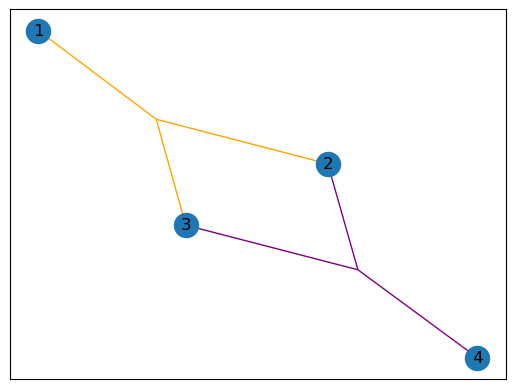

In [15]:
nodes = [1, 2, 3, 4]
hyper_edges = [
    (1, 2, 3),
    (2, 3, 4),
]
hg = HyperGraph(nodes, hyper_edges)
hg.init_simple_edges()
hg.plot()

Variables preparation to compute $X_{HG}^{(l)}$:
$$
X_{HG}^{(l)} = D_v^{-1/2}H W^{(l)} D^{-1}_e H^T D^{1/2} X_{HG}^{(l-1)} 
$$

De_m $= D^{-1}_e$ 

Dv_m12 $= D_v^{-1/2}$

Dv_12 $= D_v^{1/2}$

In [5]:
H = matrix([[1, 0], [1, 1], [1, 1], [0, 1]])
diag_de = [3, 3]
De = diagonal_matrix(diag_de)
De_m = diagonal_matrix([1/d for d in diag_de])
x, y, z, t = var("x y z t")
e1, e2 = var("e_1 e_2")
diag_dv = [e1, e1+e2, e1+e2, e2]
Dv = diagonal_matrix(diag_dv)
Dv_m12 = diagonal_matrix([d^(-1/2) for d in diag_dv])
Dv_12 = diagonal_matrix([d^(1/2) for d in diag_dv])
X = matrix([x, y, z, t]).transpose()
W = diagonal_matrix([e1, e2])

Paper's equation:
$$
X_{HG}^{(l)} = D_v^{-1/2}H W^{(l)} D^{-1}_e H^T D^{1/2} X_{HG}^{(l-1)}
$$

In [12]:
Dv_m12 * H * W * De_m * H.transpose() * Dv_12 * X

[                                                                                                                            1/3*e_1*x + 1/3*sqrt(e_1 + e_2)*sqrt(e_1)*y + 1/3*sqrt(e_1 + e_2)*sqrt(e_1)*z]
[1/3*sqrt(e_1 + e_2)*y*(e_1/sqrt(e_1 + e_2) + e_2/sqrt(e_1 + e_2)) + 1/3*sqrt(e_1 + e_2)*z*(e_1/sqrt(e_1 + e_2) + e_2/sqrt(e_1 + e_2)) + 1/3*e_2^(3/2)*t/sqrt(e_1 + e_2) + 1/3*e_1^(3/2)*x/sqrt(e_1 + e_2)]
[1/3*sqrt(e_1 + e_2)*y*(e_1/sqrt(e_1 + e_2) + e_2/sqrt(e_1 + e_2)) + 1/3*sqrt(e_1 + e_2)*z*(e_1/sqrt(e_1 + e_2) + e_2/sqrt(e_1 + e_2)) + 1/3*e_2^(3/2)*t/sqrt(e_1 + e_2) + 1/3*e_1^(3/2)*x/sqrt(e_1 + e_2)]
[                                                                                                                            1/3*e_2*t + 1/3*sqrt(e_1 + e_2)*sqrt(e_2)*y + 1/3*sqrt(e_1 + e_2)*sqrt(e_2)*z]

New equation:
$$
X_{HG}^{(l)} = D_v^{-1/2}H W^{(l)} D^{-1}_e H^T D^{-1/2} X_{HG}^{(l-1)}
$$

In [13]:
Dv_m12 * H * W * De_m * H.transpose() * Dv_m12 * X

[                                                                                                                                1/3*x + 1/3*sqrt(e_1)*y/sqrt(e_1 + e_2) + 1/3*sqrt(e_1)*z/sqrt(e_1 + e_2)]
[1/3*y*(e_1/sqrt(e_1 + e_2) + e_2/sqrt(e_1 + e_2))/sqrt(e_1 + e_2) + 1/3*z*(e_1/sqrt(e_1 + e_2) + e_2/sqrt(e_1 + e_2))/sqrt(e_1 + e_2) + 1/3*sqrt(e_2)*t/sqrt(e_1 + e_2) + 1/3*sqrt(e_1)*x/sqrt(e_1 + e_2)]
[1/3*y*(e_1/sqrt(e_1 + e_2) + e_2/sqrt(e_1 + e_2))/sqrt(e_1 + e_2) + 1/3*z*(e_1/sqrt(e_1 + e_2) + e_2/sqrt(e_1 + e_2))/sqrt(e_1 + e_2) + 1/3*sqrt(e_2)*t/sqrt(e_1 + e_2) + 1/3*sqrt(e_1)*x/sqrt(e_1 + e_2)]
[                                                                                                                                1/3*t + 1/3*sqrt(e_2)*y/sqrt(e_1 + e_2) + 1/3*sqrt(e_2)*z/sqrt(e_1 + e_2)]